# Image Histogram

# Grayscale Histogram

In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

In [44]:
def plt_imshow(title,image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.axis("on")
    plt.show()

In [45]:
image=cv2.imread("Images/beach.png")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

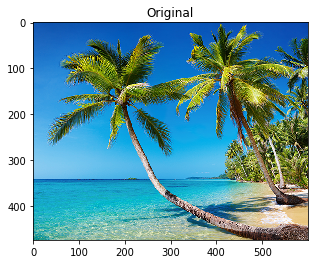

In [46]:
plt_imshow("Original",image)

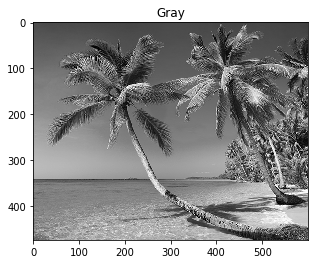

In [47]:
plt_imshow("Gray",gray)

In [48]:
hist=cv2.calcHist([gray],[0],None,[256],[0,256])
normalize_hist=hist/hist.sum()

(0, 256)

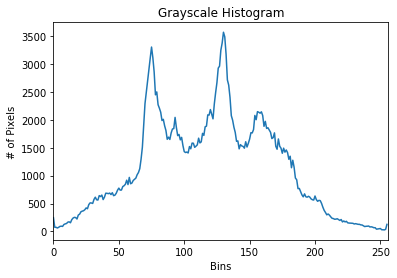

In [49]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0,256])


(0, 256)

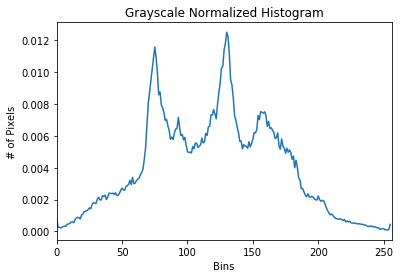

In [50]:
plt.figure()
plt.title("Grayscale Normalized Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(normalize_hist)
plt.xlim([0,256])

# Histogram

In [108]:
def plot_histogram(title,image,mask=None):
    chans=cv2.split(image)
    colors=("b","g","r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    
    for (chan,color) in zip(chans,colors):
        hist=cv2.calcHist([chan],[0],mask,[256],[0,256])
        plt.plot(hist,color=color)
        plt.xlim([0,256])
        
    
    

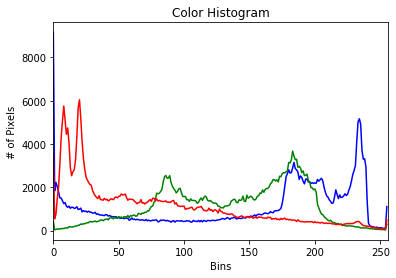

In [109]:
plot_histogram("Color Histogram",image)

# Histogram with Mask

In [85]:
(h,w,c)=image.shape[:]

In [86]:
mask=np.zeros((h,w),dtype="uint8")

In [87]:
mask=cv2.rectangle(mask,(50,300),(200,400),255,-1)

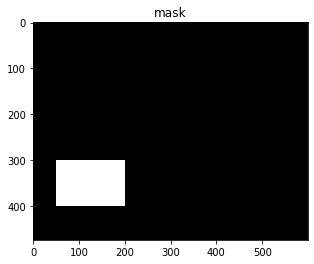

In [88]:
plt_imshow("mask",mask)

In [89]:
masked=cv2.bitwise_and(image,image,mask=mask)

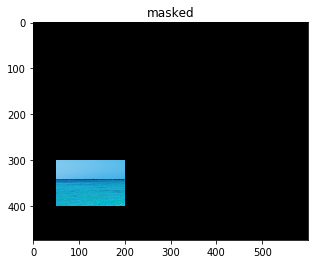

In [90]:
plt_imshow("masked",masked)

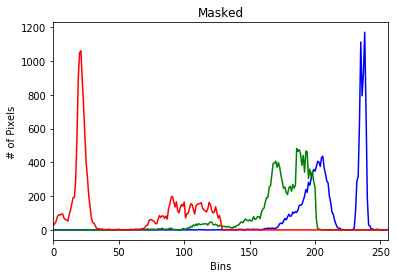

In [91]:
plot_histogram("Masked",image,mask)


# 2D Histogram

2D histogram shape: (32, 32), with 1024 values


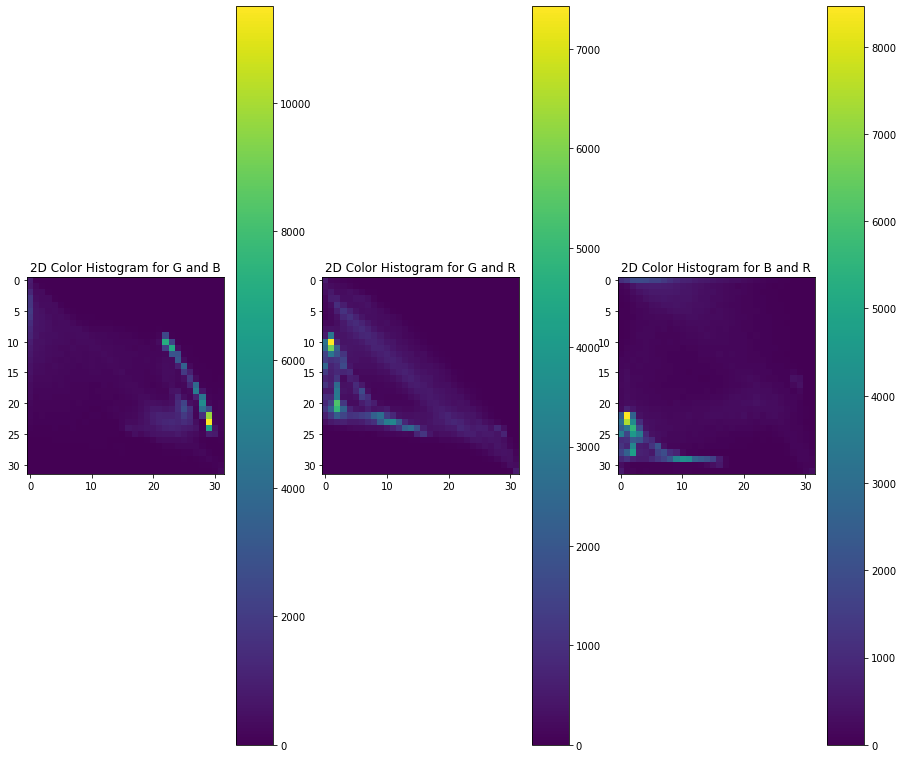

In [116]:
# create a new figure and then plot a 2D color histogram for the
# green and blue channels
fig = plt.figure(figsize=(15, 25))
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# plot a 2D color histogram for the green and red channels
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# plot a 2D color histogram for blue and red channels
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

# 3D

In [112]:
# our 2D histogram could only take into account 2 out of the 3
# channels in the image so now let's build a 3D color histogram
# (utilizing all channels) with 8 bins in each direction -- we
# can't plot the 3D histogram, but the theory is exactly like
# that of a 2D histogram, so we'll just show the shape of the
# histogram
hist = cv2.calcHist([image], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0])) 


3D histogram shape: (8, 8, 8), with 512 values


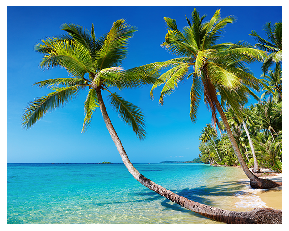

In [115]:
# display the original input image
plt.figure()
plt.axis("off")
plt.imshow(imutils.opencv2matplotlib(image))

# show our plots
plt.show()